In [113]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import numpy as np

with MPRester("nfHDloqMhx9N7jWGsB8") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-762")
    
    # Including data into a cif file
    w = CifWriter(structure)
    w.write_file('mp-762.cif')
    
    K = SpacegroupAnalyzer(structure)
    
    # On trouve les sites périodique en coordonées cartésienne et par rapport aux vecteurs de base avec:
    Pos = structure.sites
    #print(Pos)
    
    # On obtient toutes les opérations de symétries grâce à:
    Sym = K.get_point_group_operations()

    # Initialisation des variables
    Kart = np.zeros((3,3))
    NewKart = np.zeros((3,3))
    Spce = np.array(["0","0","0"])
    xyz = np.zeros(3)
    
    for i in range(3):
        # On obtient uniquement les coordonées cartésiennes et le type de l'atome i avec:
        Kart[i] = Pos[i].coords
        Spce[i] = Pos[i].specie    
    
        # On effectue tout d'abord l'opération 2 (opération d'inversion) sur l'atome de Souffre [0.6667, 0.333, 0.8035]
        # On effectue ensuite l'opération 4 (roto-inversion d'ordre 3) sur l'atome de Souffre [0.3333, 0.6667, 0.1965]
        # On effectue enfin l'opération 6 (roto-inversion d'ordre 3) sur l'atome de Platine [0, 0, 0]
        NewKart[i] = Sym[2*i+1].operate(Kart[i])
        #print(Sym[2*i+1].as_xyz_string())        

     

[PeriodicSite: S (1.7900, 1.0335, 5.0224) [0.6667, 0.3333, 0.8035], PeriodicSite: S (-0.0000, 2.0670, 1.2284) [0.3333, 0.6667, 0.1965], PeriodicSite: Pt (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]]


In [112]:
print("Les vecteurs abc et les angles alpha,beta,gamma de la maille du cristal: ")
structure.lattice.abc, structure.lattice.angles

Les vecteurs abc et les angles alpha,beta,gamma de la maille du cristal: 


((3.58007363, 3.5800736266350386, 6.25086739),
 (90.0, 90.0, 119.99999993869251))

In [114]:
print("Coordonées cartésiennes de l'atome de",Spce[0],"de position: [",Pos[0].a,Pos[0].b,Pos[0].c,"] par rapport aux vecteurs abc avant et après l'opération d'inversion(-1) centrée en (0,0,0) soit:")
print("x, y, z to",Sym[1].as_xyz_string())
Kart[0], NewKart[0]

Coordonées cartésiennes de l'atome de S de position: [ 0.66666667 0.33333333 0.80347988 ] par rapport aux vecteurs abc avant et après l'opération d'inversion(-1) centrée en (0,0,0) soit:
x, y, z to -x, -y, -z


(array([1.79003683, 1.03347823, 5.02244618]),
 array([-1.79003683, -1.03347823, -5.02244618]))

illustration de la symétrie


<function matplotlib.pyplot.show(*args, **kw)>

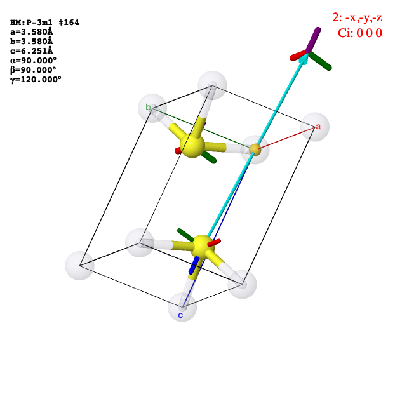

In [95]:
import matplotlib.pyplot as plt
import matplotlib.image as im

print("illustration de la symétrie")
image = im.imread("Image1.png")
axes = plt.subplots(figsize=(7,7))
plt.imshow(image)
plt.axis("off")
plt.show


In [115]:
print("Coordonées cartésiennes de l'atome de",Spce[1],"de position: [",Pos[1].a,Pos[1].b,Pos[1].c,"] par rapport aux vecteurs abc avant et après l'opération de roto-inversion d'ordre 3 parallèles à la direction [001] soit:")
print("x, y, z to",Sym[3].as_xyz_string())
Kart[1], NewKart[1]

Coordonées cartésiennes de l'atome de S de position: [ 0.33333333 0.66666667 0.19652012 ] par rapport aux vecteurs abc avant et après l'opération de roto-inversion d'ordre 3 parallèles à la direction [001] soit:
x, y, z to y, -x+y, -z


(array([-1.45670349e-08,  2.06695648e+00,  1.22842121e+00]),
 array([ 2.06695648,  2.0669565 , -1.22842121]))

illustration de la symétrie


<function matplotlib.pyplot.show(*args, **kw)>

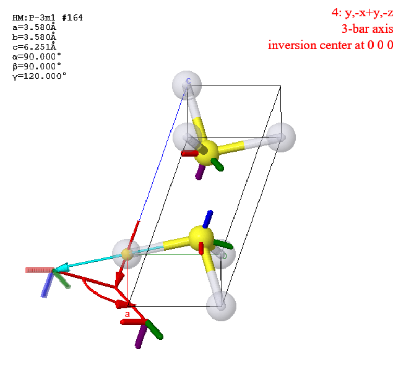

In [97]:
import matplotlib.pyplot as plt
import matplotlib.image as im

print("illustration de la symétrie")
image = im.imread("Image2.PNG")
axes = plt.subplots(figsize=(7,7))
plt.imshow(image)
plt.axis("off")
plt.show


In [116]:
print("Coordonées cartésiennes de l'atome de",Spce[2],"de position: [",Pos[2].a,Pos[2].b,Pos[2].c,"] par rapport aux vecteurs abc avant et après l'opération roto-inversion d'ordre 3 respectant:")
print("x, y, z to",Sym[5].as_xyz_string())
print("(cet atome restera à la même place pour chaque opérations puisque il s'agit du centre d'inversion et de rotation pour celles-ci")
Kart[2], NewKart[2]

Coordonées cartésiennes de l'atome de P de position: [ 0.0 0.0 0.0 ] par rapport aux vecteurs abc avant et après l'opération roto-inversion d'ordre 3 respectant:
x, y, z to x-y, x, -z
(cet atome restera à la même place pour chaque opérations puisque il s'agit du centre d'inversion et de rotation pour celles-ci


(array([0., 0., 0.]), array([0., 0., 0.]))

illustration de la symétrie


<function matplotlib.pyplot.show(*args, **kw)>

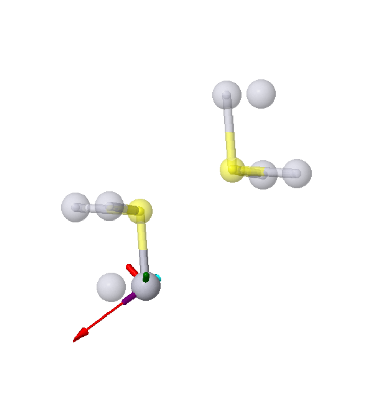

In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as im

print("illustration de la symétrie")
image = im.imread("Image3.PNG")
axes = plt.subplots(figsize=(7,7))
plt.imshow(image)
plt.axis("off")
plt.show